# <center> ***Visión computacional para imágenes y video*** </center>
## <center> ***10. Morphological Operations*** </center>
### Profesor: Gilberto Ochoa Ruiz
### Alumnos:
* Alberto Nieves Cisneros            A01793829
* Aurelio Antonio Lozano Rábago      A01081266
* Héctor Manuel González Villareal   A00178679
* Jessica Lechuga Ramos              A01793512
* Luis Alfredo Negron Naldos         A01793865

#### <p style='text-align: right;'> 5 de Febrero del 2023 </p>

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)
8. [Exercises](#exercises)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [145]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [146]:
img = cv2.imread("data/image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/image.jpg",0)

(400, 700, 3) (400, 700, 3) (400, 700)


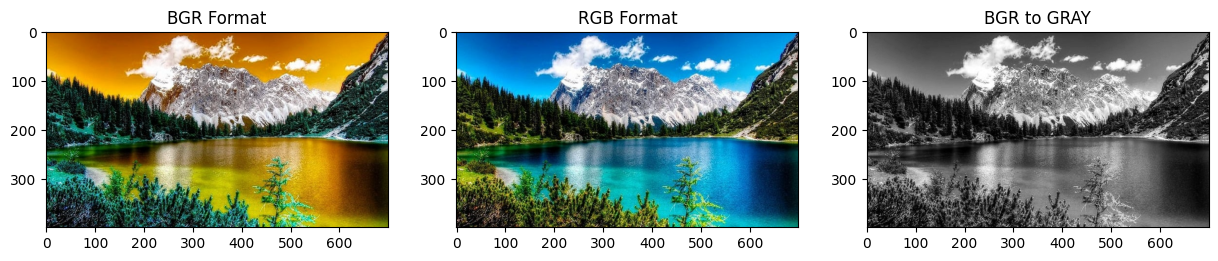

In [147]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()
    
imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

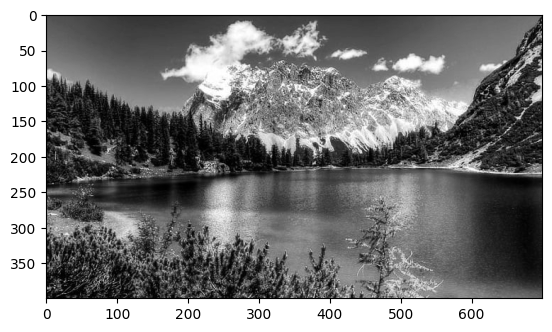

In [148]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

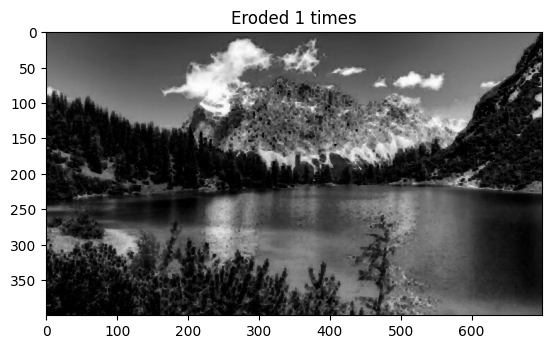

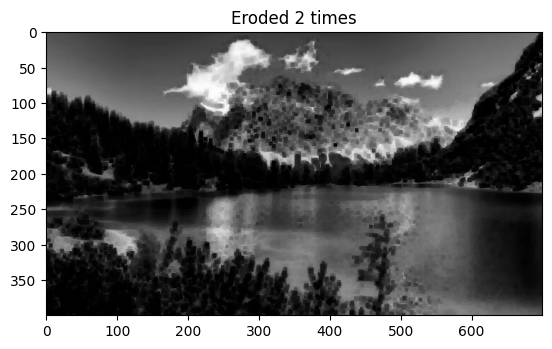

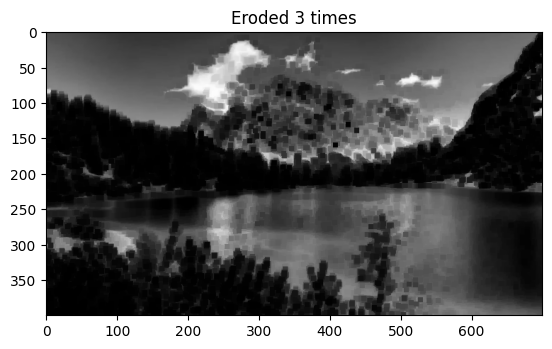

In [149]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()
    
for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

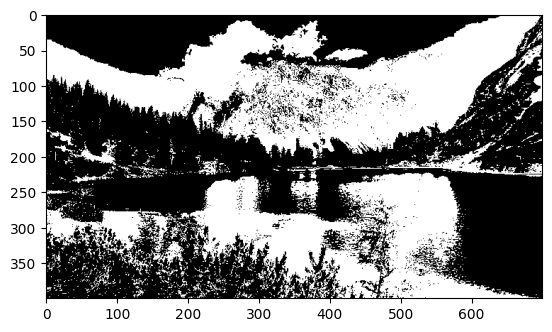

In [150]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

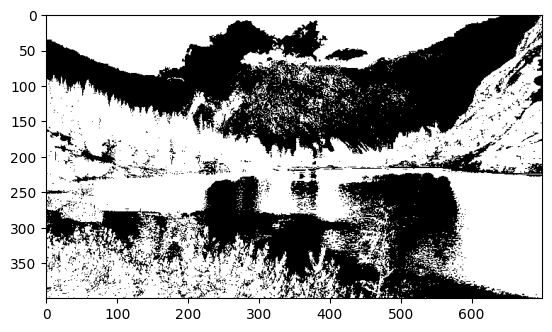

In [151]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [152]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


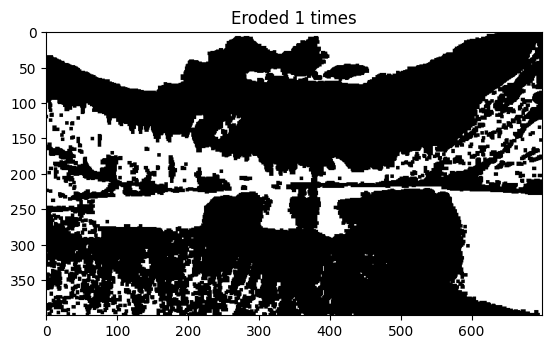

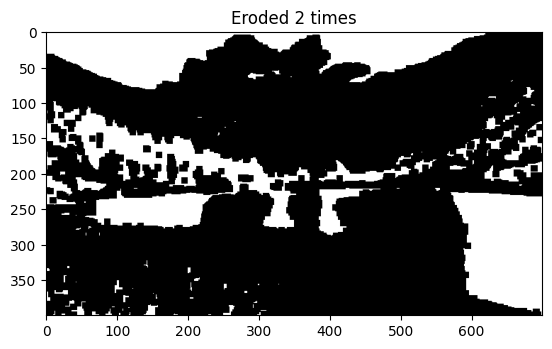

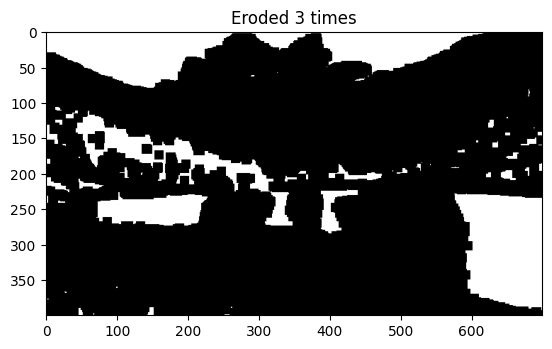

In [153]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

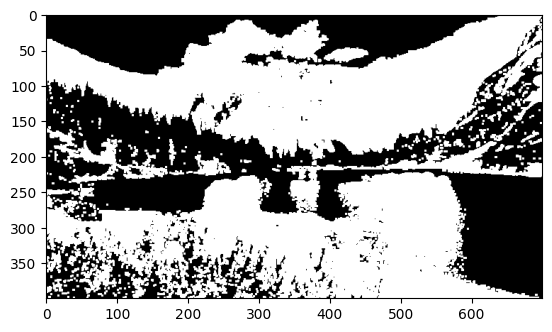

In [154]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)
 
plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


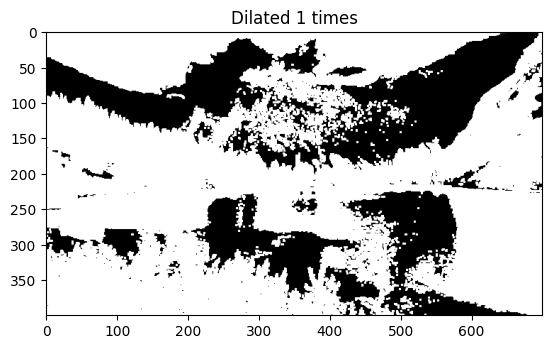

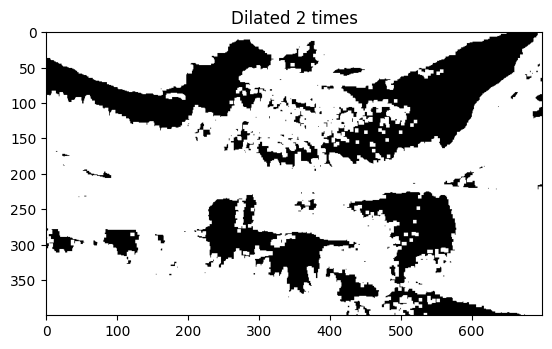

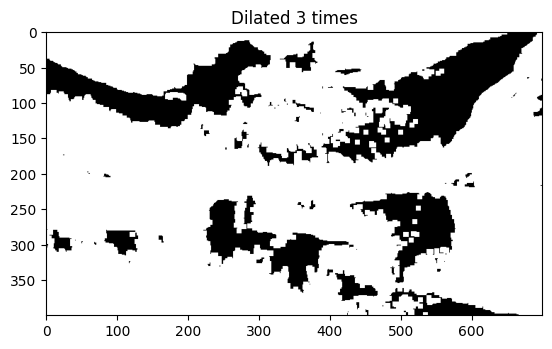

In [155]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

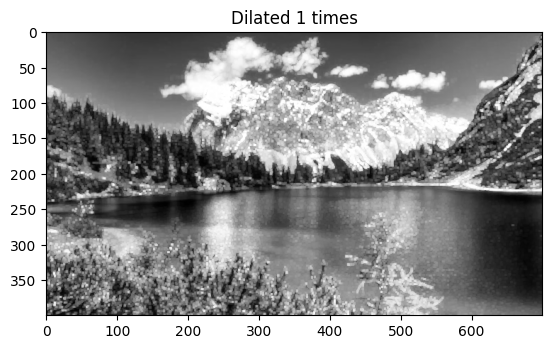

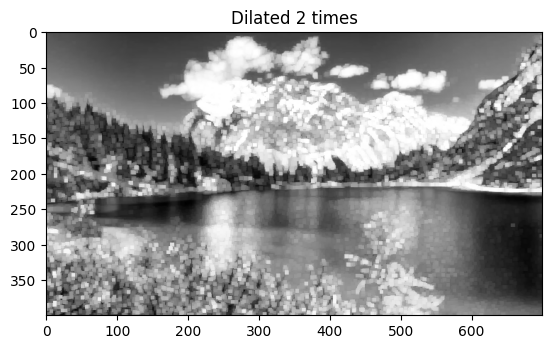

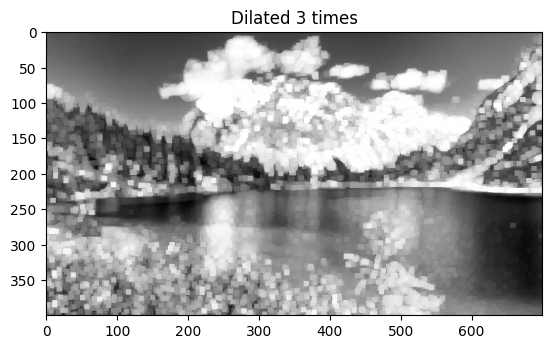

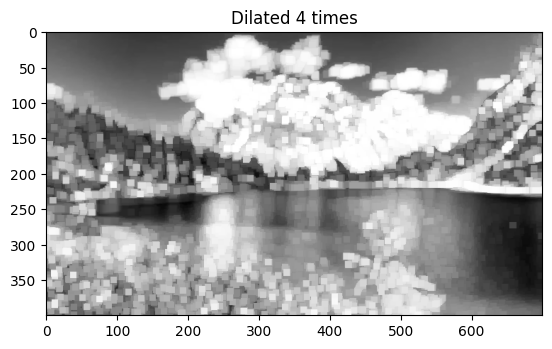

In [156]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


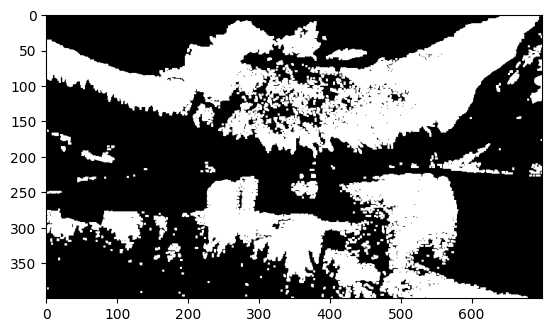

In [157]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

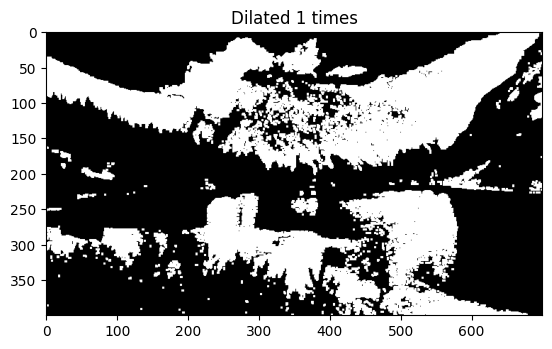

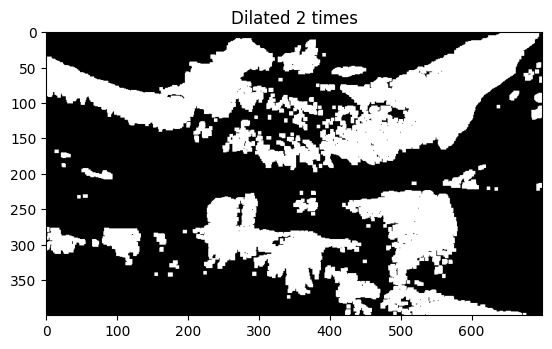

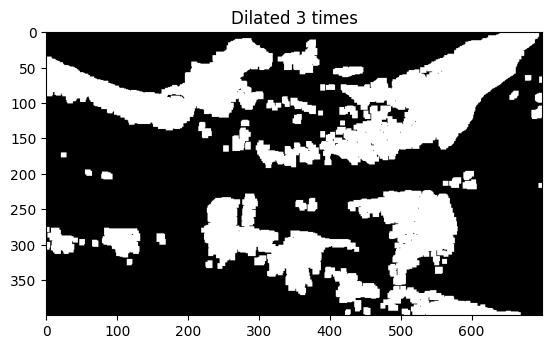

In [158]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

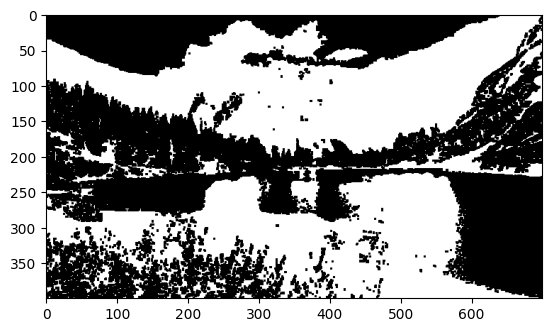

In [159]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)
 
#print output
plt.imshow(closing,cmap='gray')
plt.show()

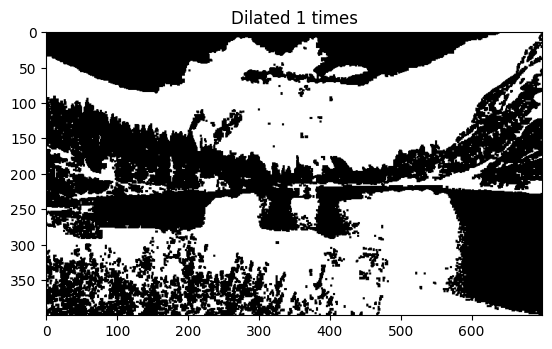

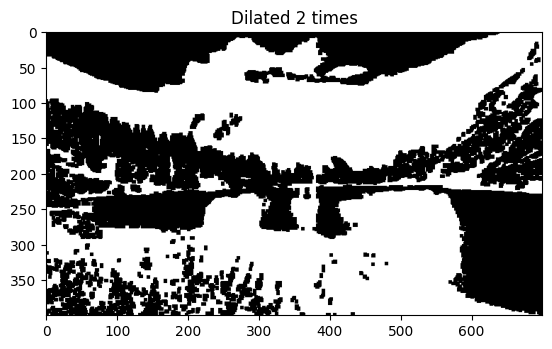

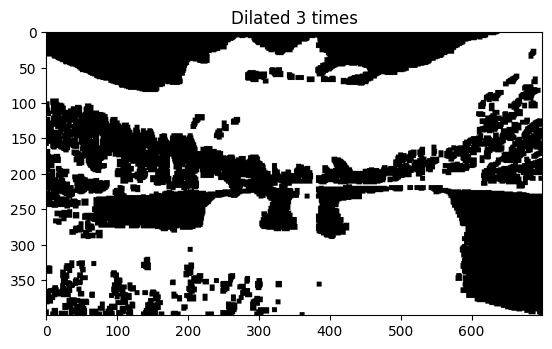

In [160]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

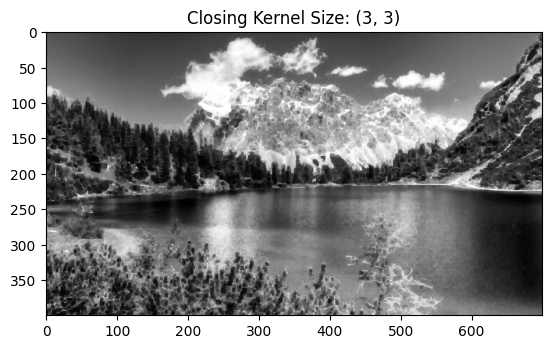

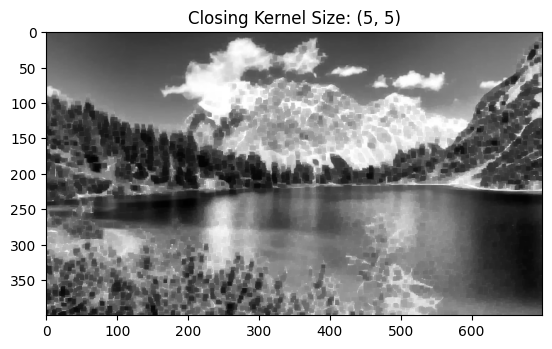

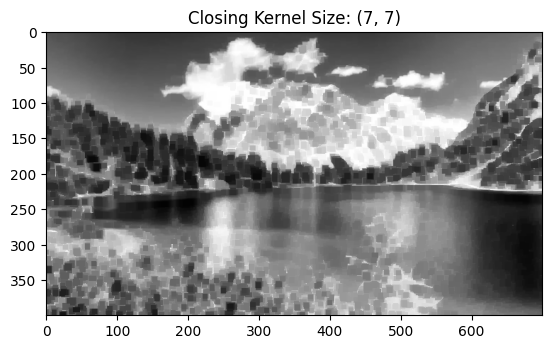

In [161]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

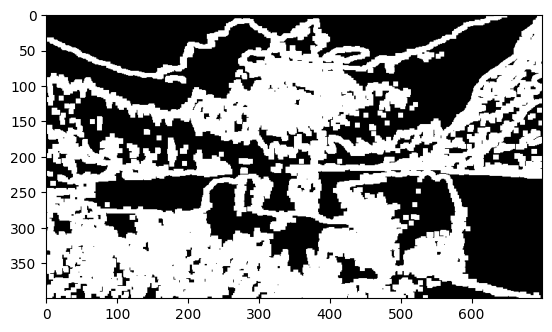

In [162]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)
 
#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

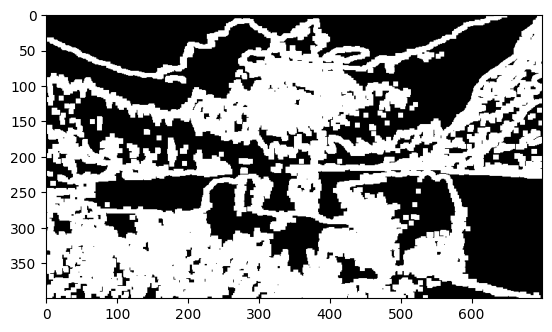

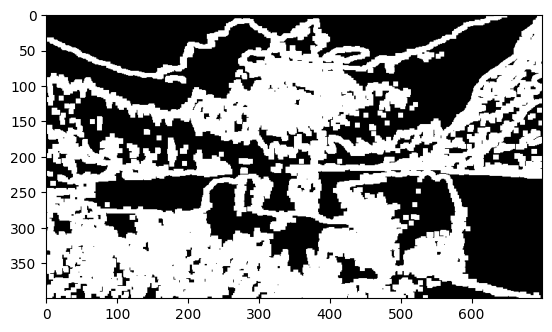

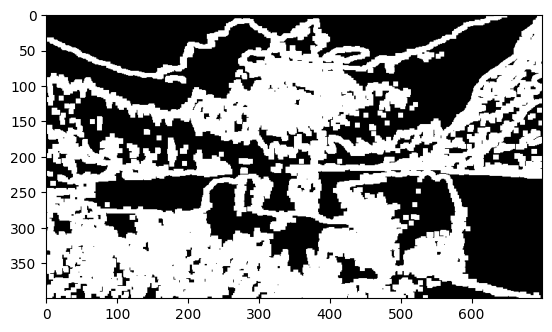

In [163]:
for i in range(0,3): 
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

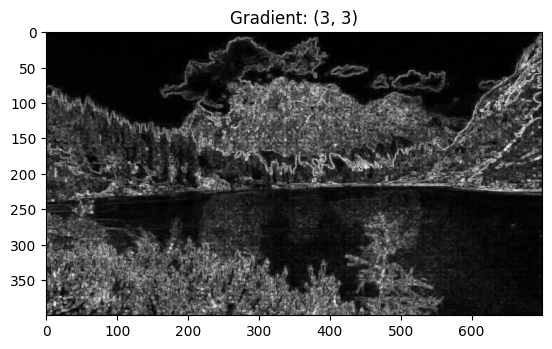

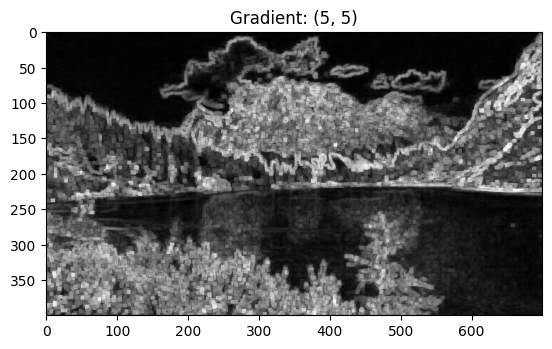

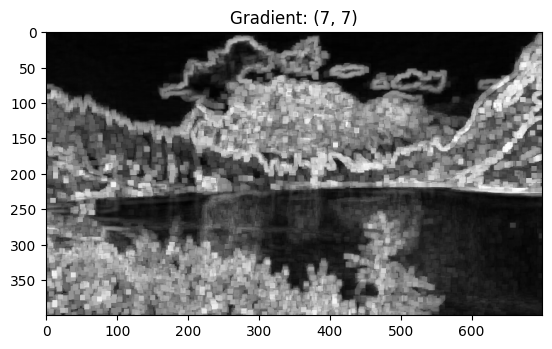

In [164]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [165]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

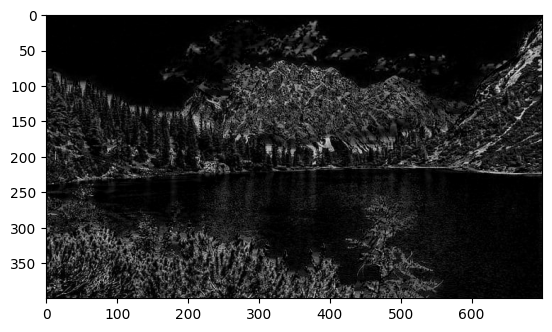

In [166]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


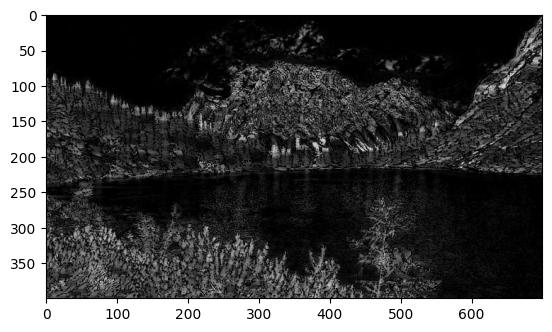

In [167]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()

## Implementar los siguientes ejercicios<a class="anchor" id="exercises"></a>:

1. Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab
2. Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab
3. Investigar una aplicación de opening y closing e implementalo en Google Colab

## Ejercicio 1
Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

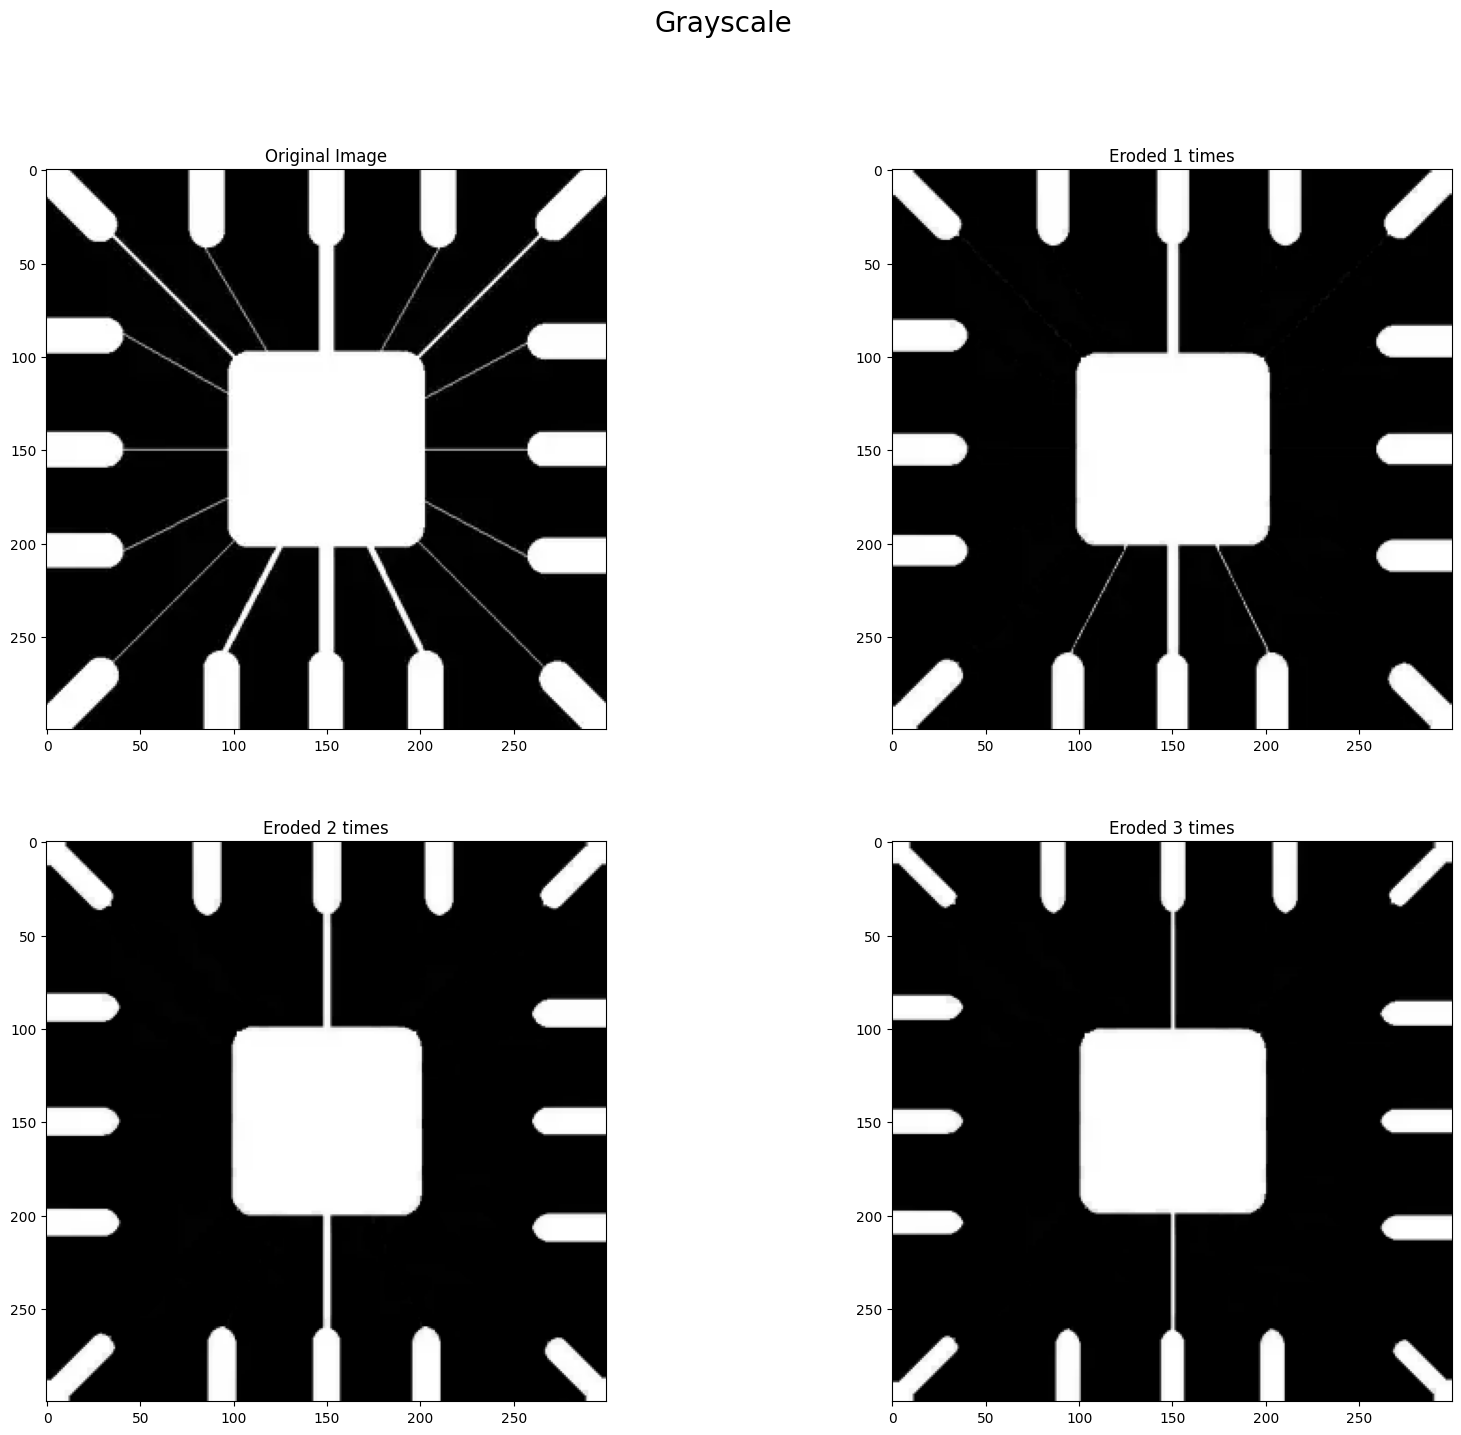

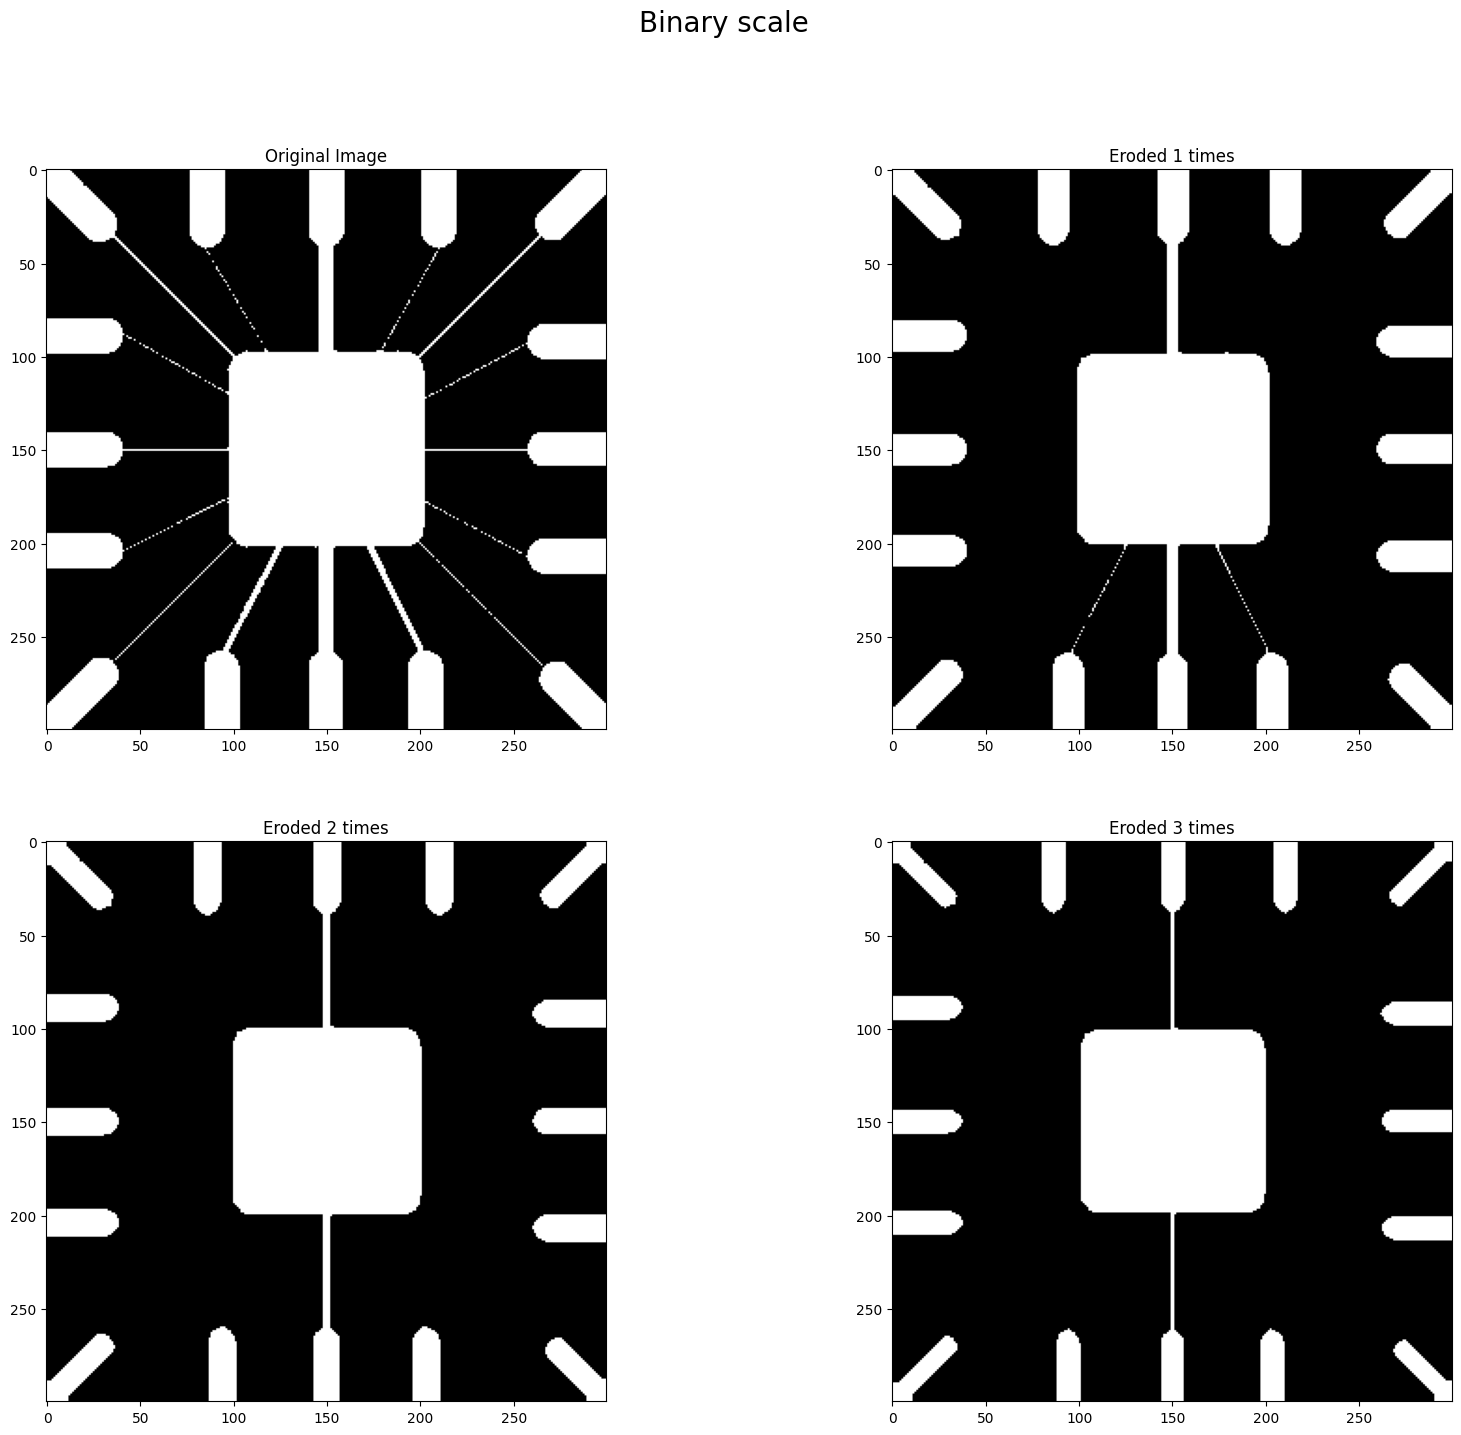

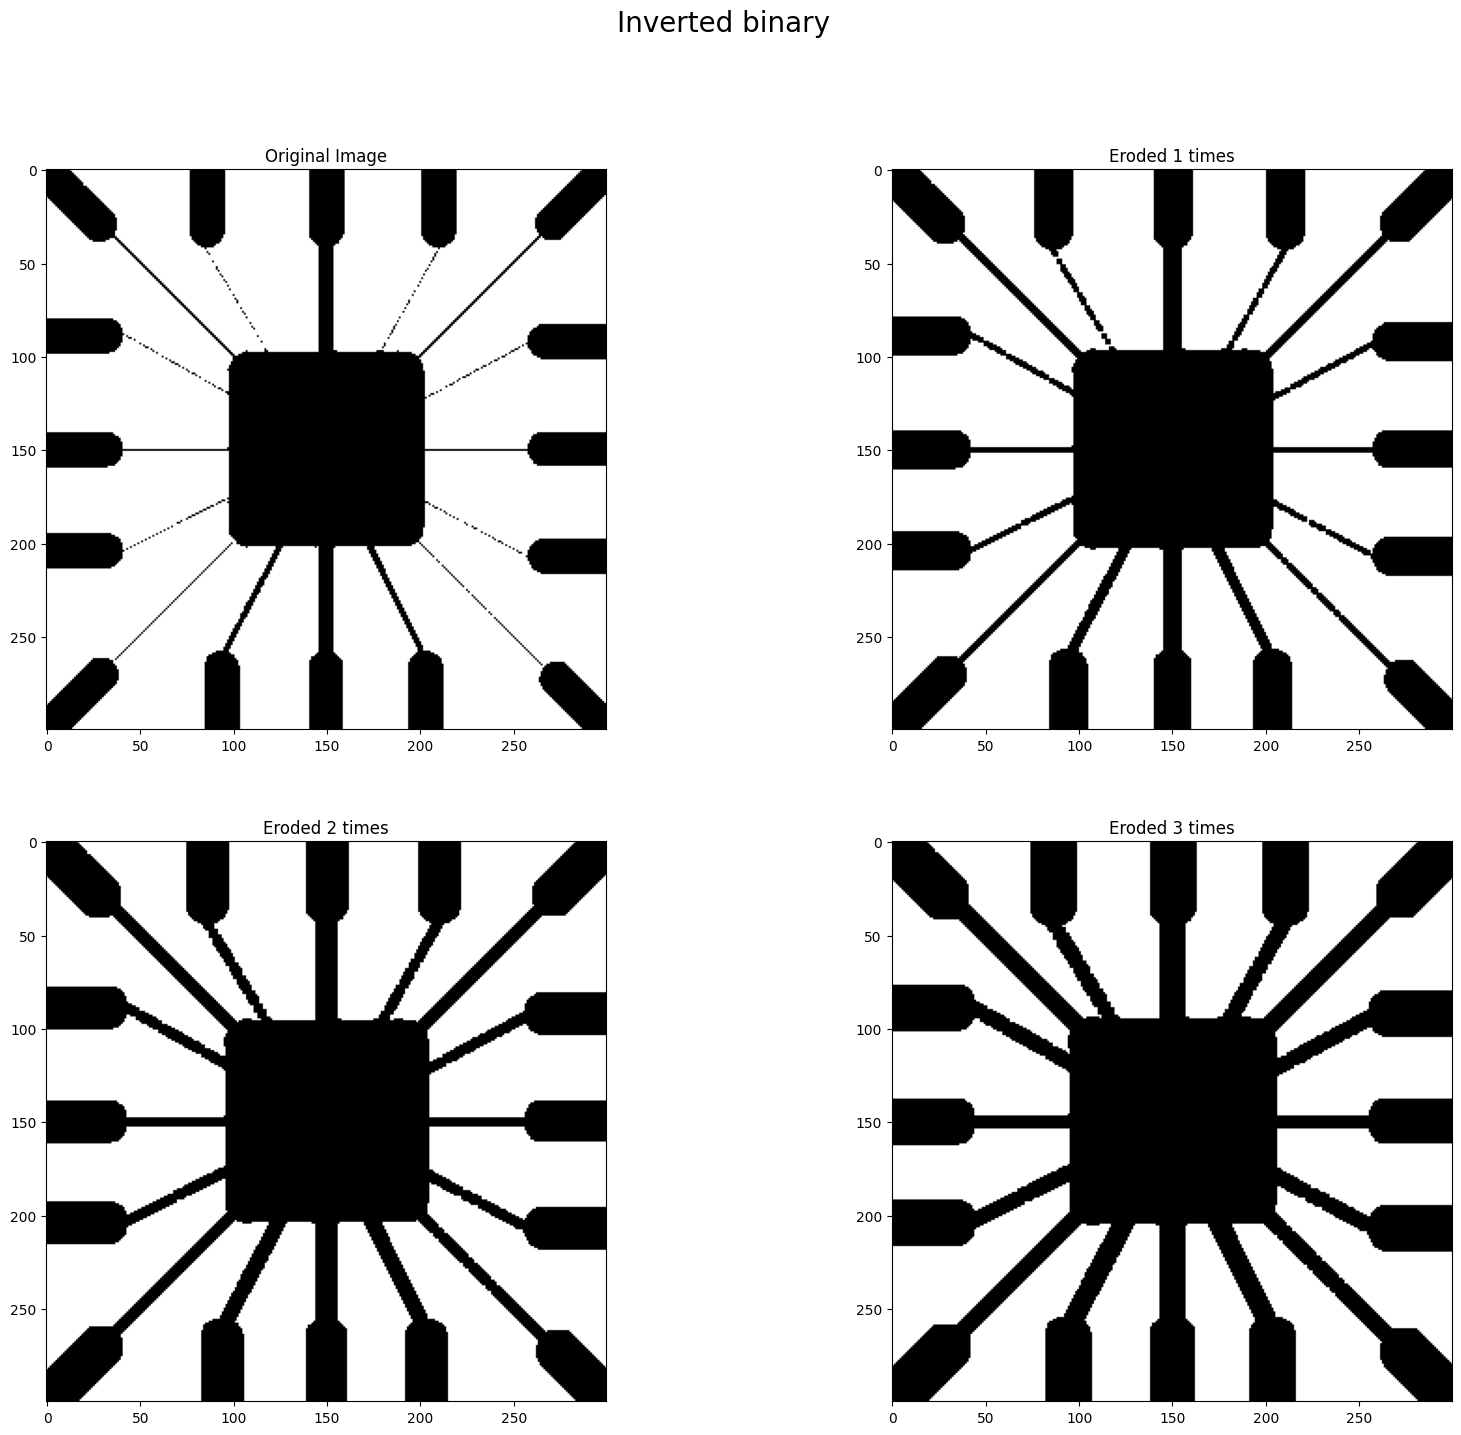

In [168]:
size_kernel = 3
#Creating kernel
kernel = np.ones((size_kernel, size_kernel), np.uint8)
#Import image
#img = cv2.imread("data/escrito.jpg")
#img = cv2.imread("data/s.png")
img = cv2.imread("data/dil.webp")

#------------------------------------------------------------------------------------------------------------------
#Convert the image to Grayscale
BGR2GRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#GRAY
fig = plt.figure(figsize=(20, 16))
fig.suptitle("Grayscale", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(BGR2GRAY, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

for i in range(0,3):
    #Application of the method
    eroded = cv2.erode(BGR2GRAY.copy(), kernel=kernel, iterations=i+1)
    # Subplot for processed image
    plt.subplot((221 + i + 1)), plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_BGR2RGB))
    plt.title("Eroded {} times".format(i+1))

plt.show()

#------------------------------------------------------------------------------------------------------------------
#Convert the image to binary scale
BINR = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

fig = plt.figure(figsize=(20, 16))
fig.suptitle("Binary scale", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(BINR, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

for i in range(0,3):
    #Application of the method
    eroded = cv2.erode(BINR.copy(), kernel=kernel, iterations=i+1)
    # Subplot for processed image
    plt.subplot((221 + i + 1)), plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_BGR2RGB))
    plt.title("Eroded {} times".format(i+1))

plt.show()

#------------------------------------------------------------------------------------------------------------------
#Convert the image to inverted binary scale
INV = cv2.bitwise_not(BINR)

fig = plt.figure(figsize=(20, 16))
fig.suptitle("Inverted binary", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(INV, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

for i in range(0,3):
    #Application of the method
    eroded = cv2.erode(INV.copy(), kernel=kernel, iterations=i+1)
    # Subplot for processed image
    plt.subplot((221 + i + 1)), plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_BGR2RGB))
    plt.title("Eroded {} times".format(i+1))

plt.show()


Esta operación “afina” los objetos de una imagen binaria. 

La forma en que se erosionan los objetos depende de un elemento estructural.

## Ejercicio 2
Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

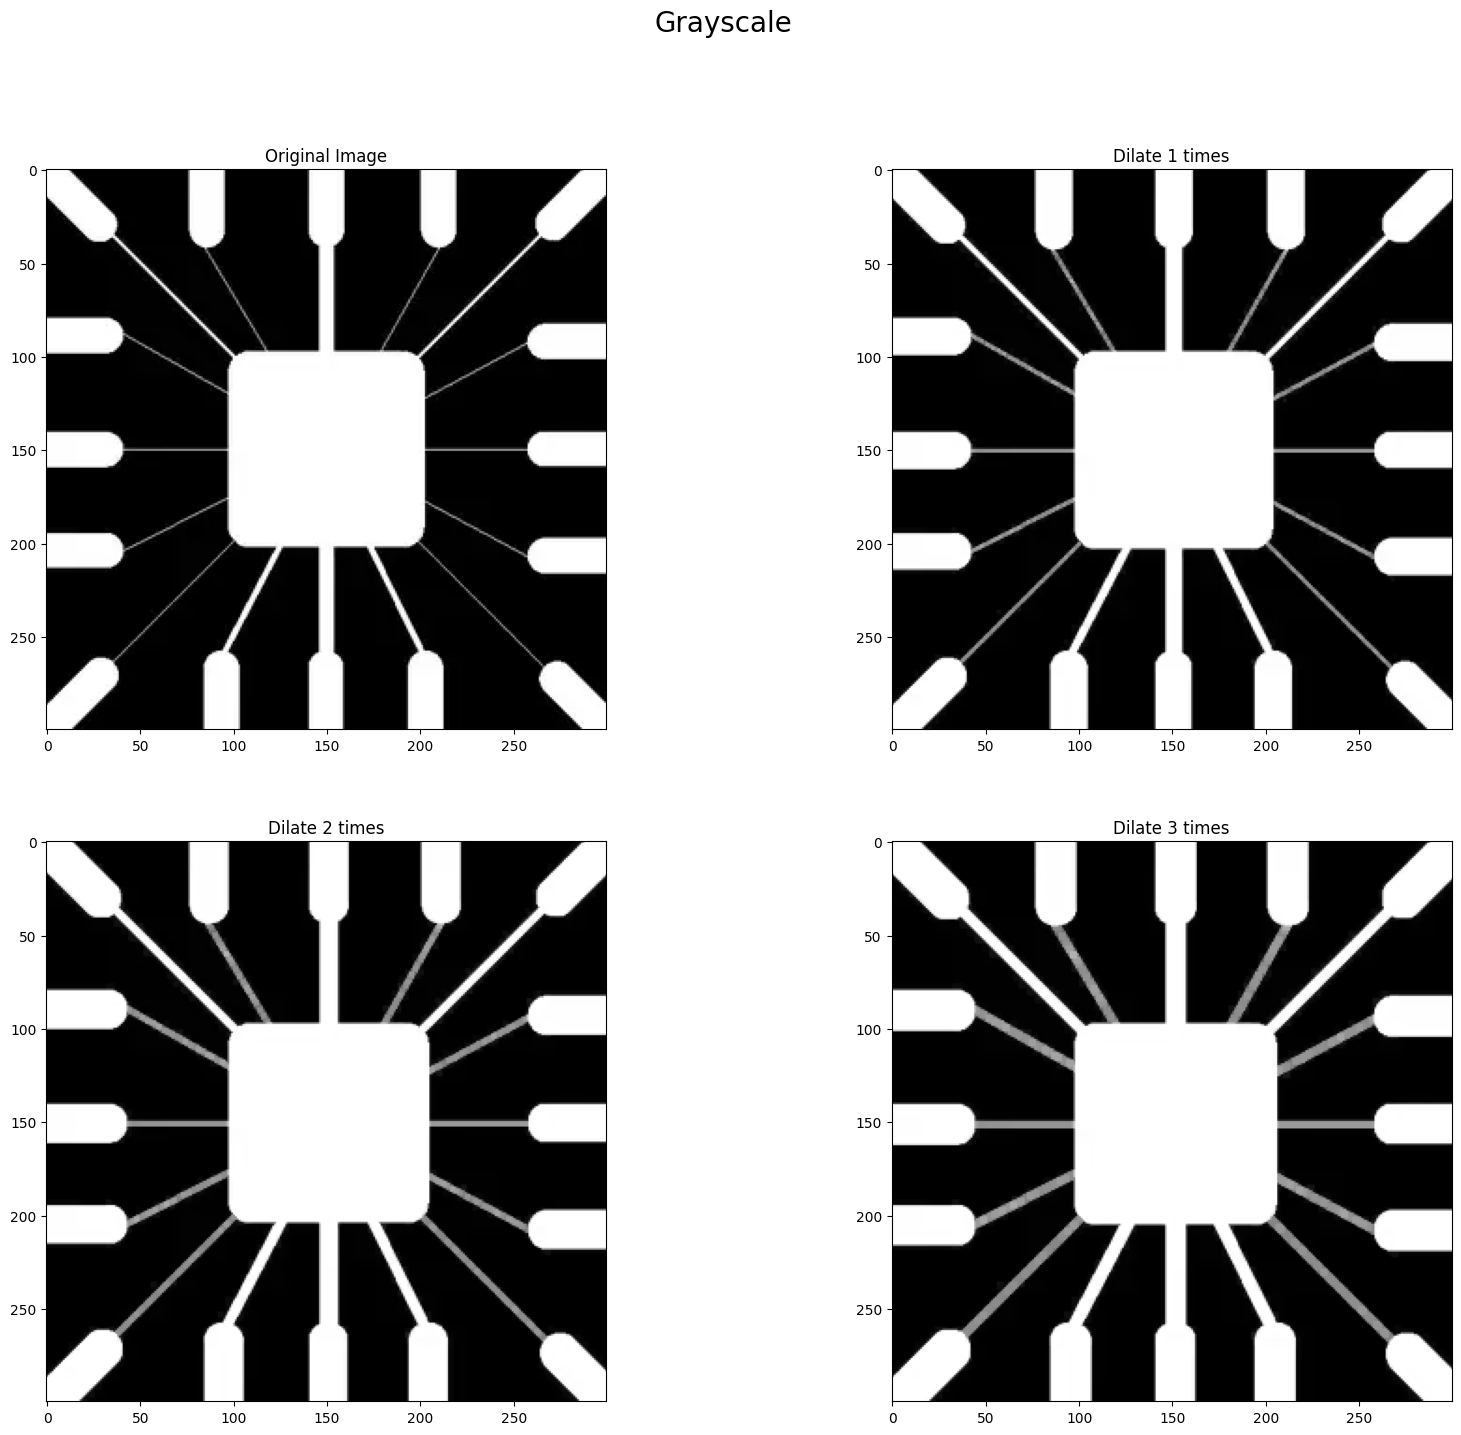

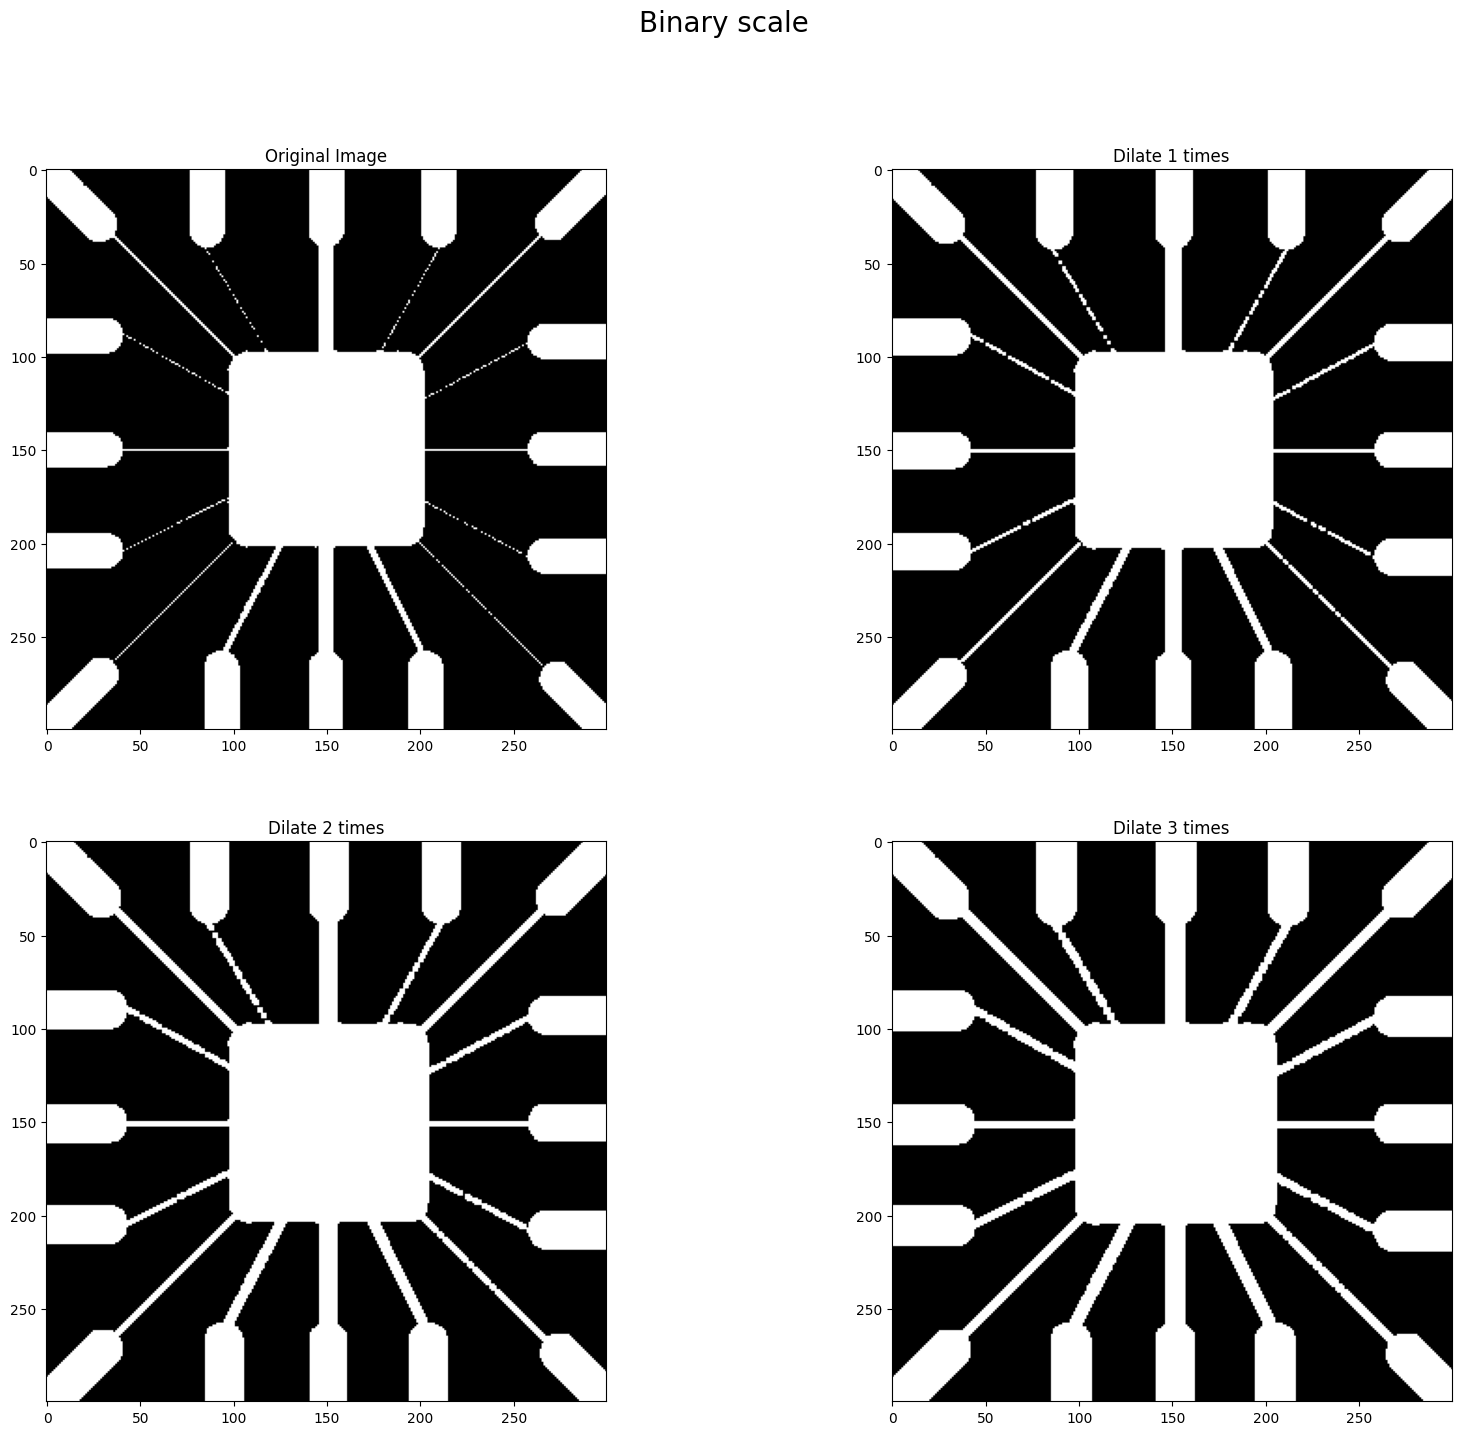

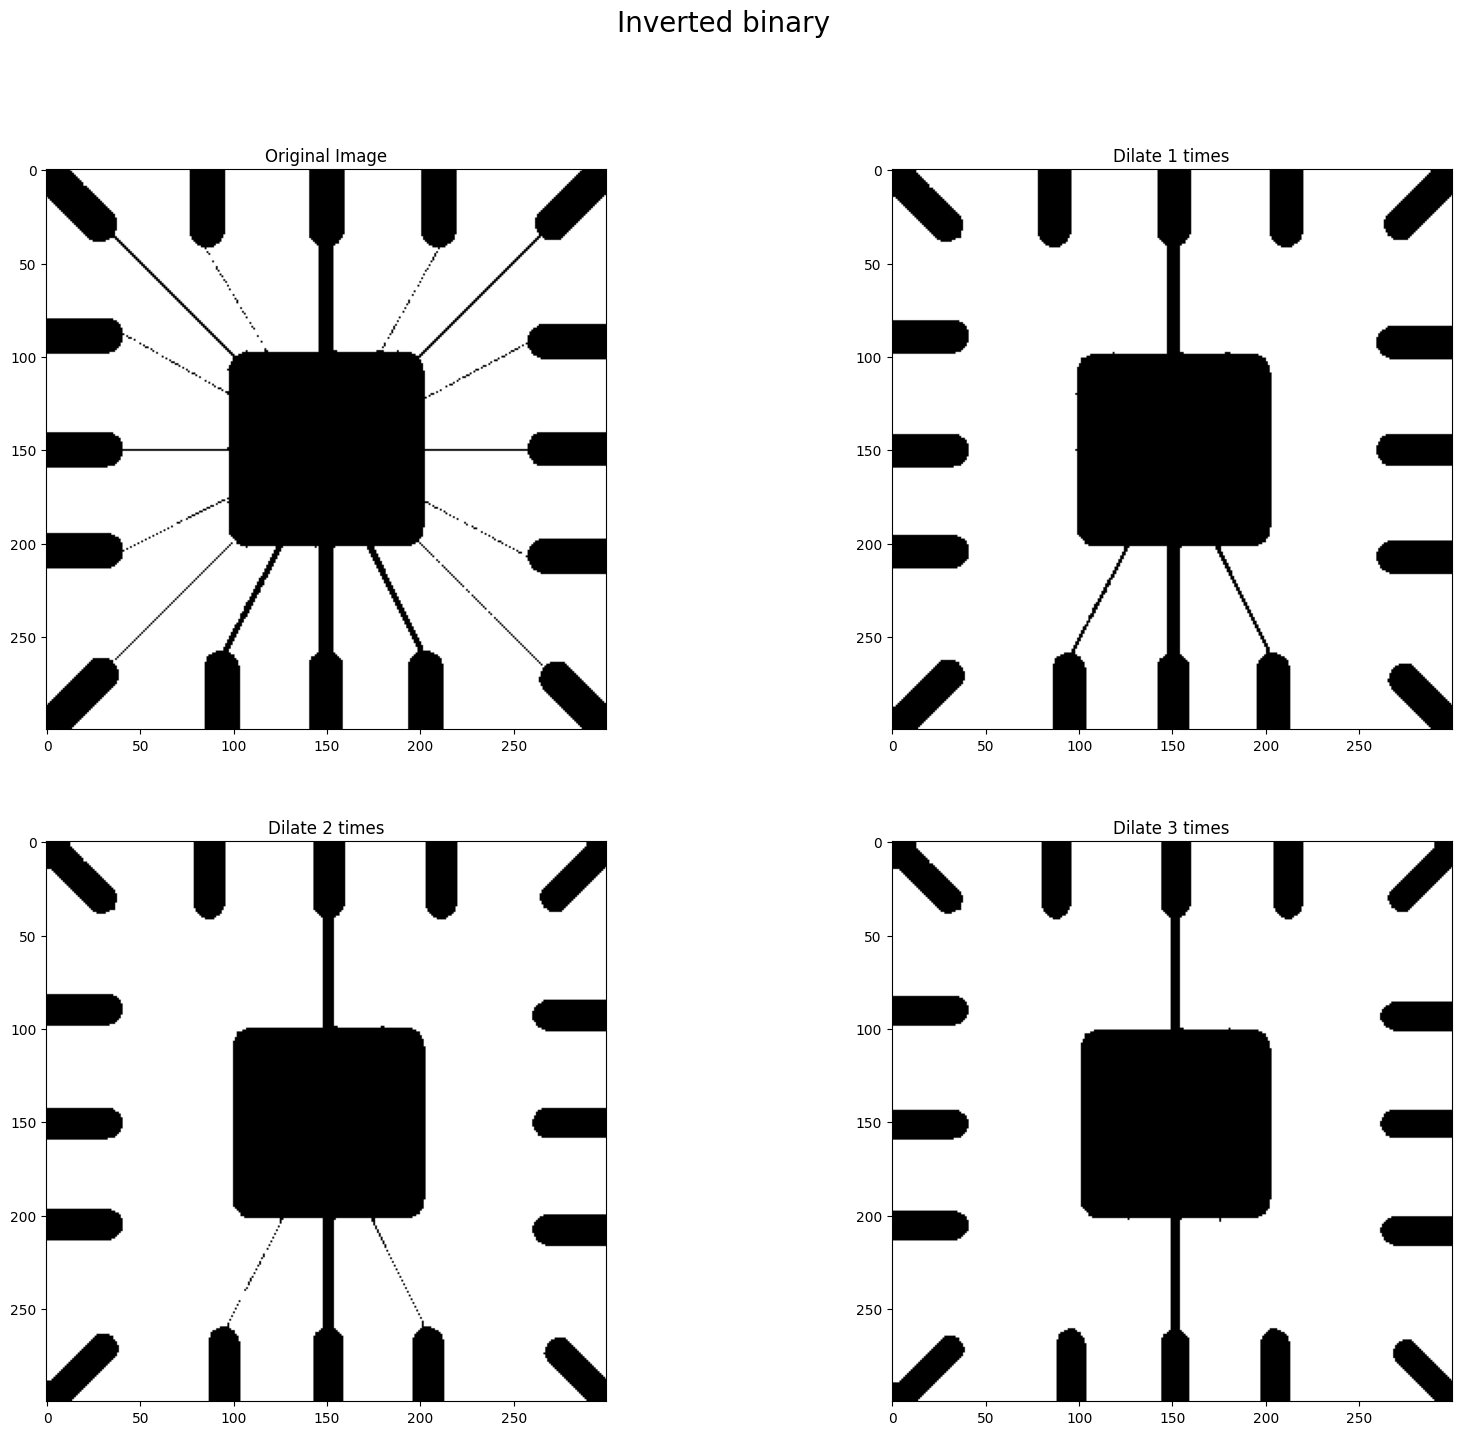

In [169]:
size_kernel = 2
#Creating kernel
kernel = np.ones((size_kernel, size_kernel), np.uint8)
#Import image
#img = cv2.imread("data/escrito.jpg")
#img = cv2.imread("data/s.png")
img = cv2.imread("data/dil.webp")

#------------------------------------------------------------------------------------------------------------------
#Convert the image to Grayscale
BGR2GRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Gray
fig = plt.figure(figsize=(20, 16))
fig.suptitle("Grayscale", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(BGR2GRAY, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

for i in range(0,3):
    #Application of the method
    dilate = cv2.dilate(BGR2GRAY.copy(), kernel=kernel, iterations=i+1)
    # Subplot for processed image
    plt.subplot((221 + i + 1)), plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
    plt.title("Dilate {} times".format(i+1))

plt.show()

#-------------------------------------------------------------------------------------
#Convert the image to binary scale
BINR = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

fig = plt.figure(figsize=(20, 16))
fig.suptitle("Binary scale", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(BINR, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

for i in range(0,3):
    #Application of the method
    dilate = cv2.dilate(BINR.copy(), kernel=kernel, iterations=i+1)
    # Subplot for processed image
    plt.subplot((221 + i + 1)), plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
    plt.title("Dilate {} times".format(i+1))

plt.show()

#------------------------------------------------------------------------------------------------------------------
#Convert the image to inverted binary scale
INV = cv2.bitwise_not(BINR)

fig = plt.figure(figsize=(20, 16))
fig.suptitle("Inverted binary", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(INV, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

for i in range(0,3):
    #Application of the method
    dilate = cv2.dilate(INV.copy(), kernel=kernel, iterations=i+1)
    # Subplot for processed image
    plt.subplot((221 + i + 1)), plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
    plt.title("Dilate {} times".format(i+1))

plt.show()

Esta operación “aumenta” o “engrosa” los objetos de una imagen binaria.

La forma en que se engrosan los objetos depende de un elemento estructural.

## Ejercicio 3
Investigar una aplicación de opening y closing e implementalo en Google Colab

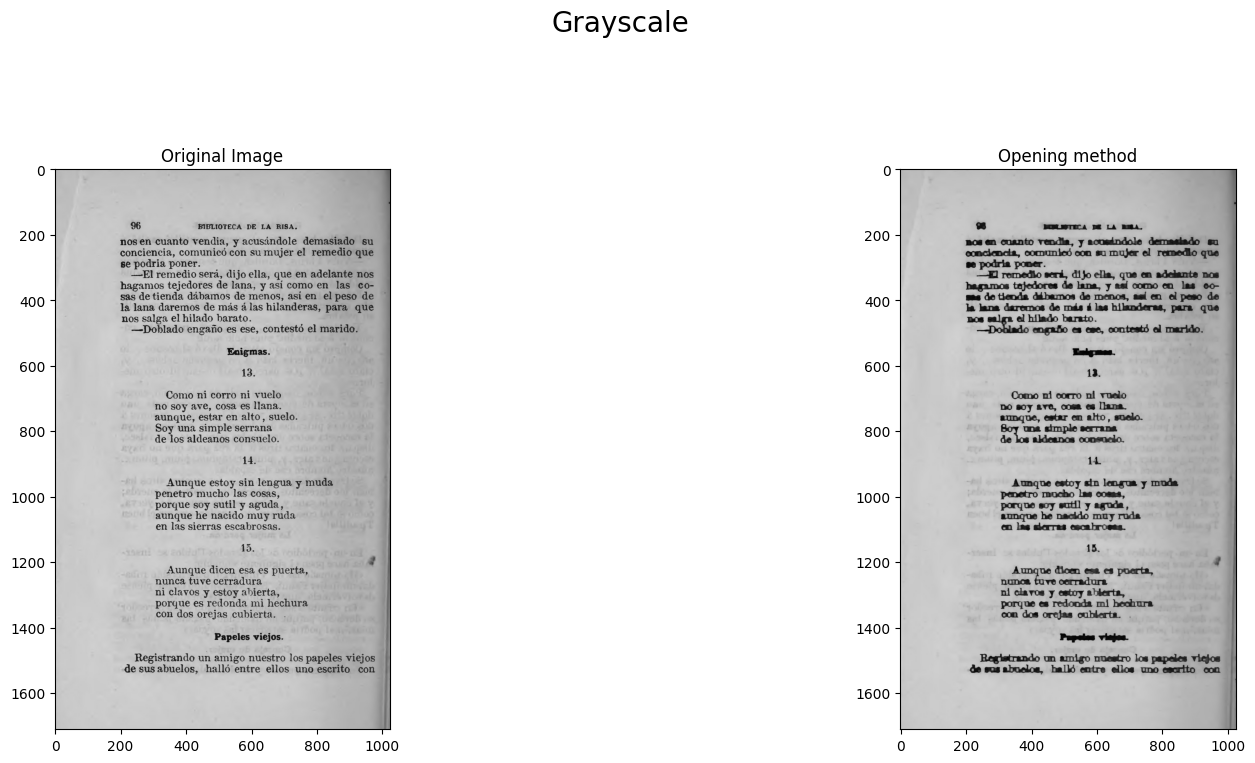

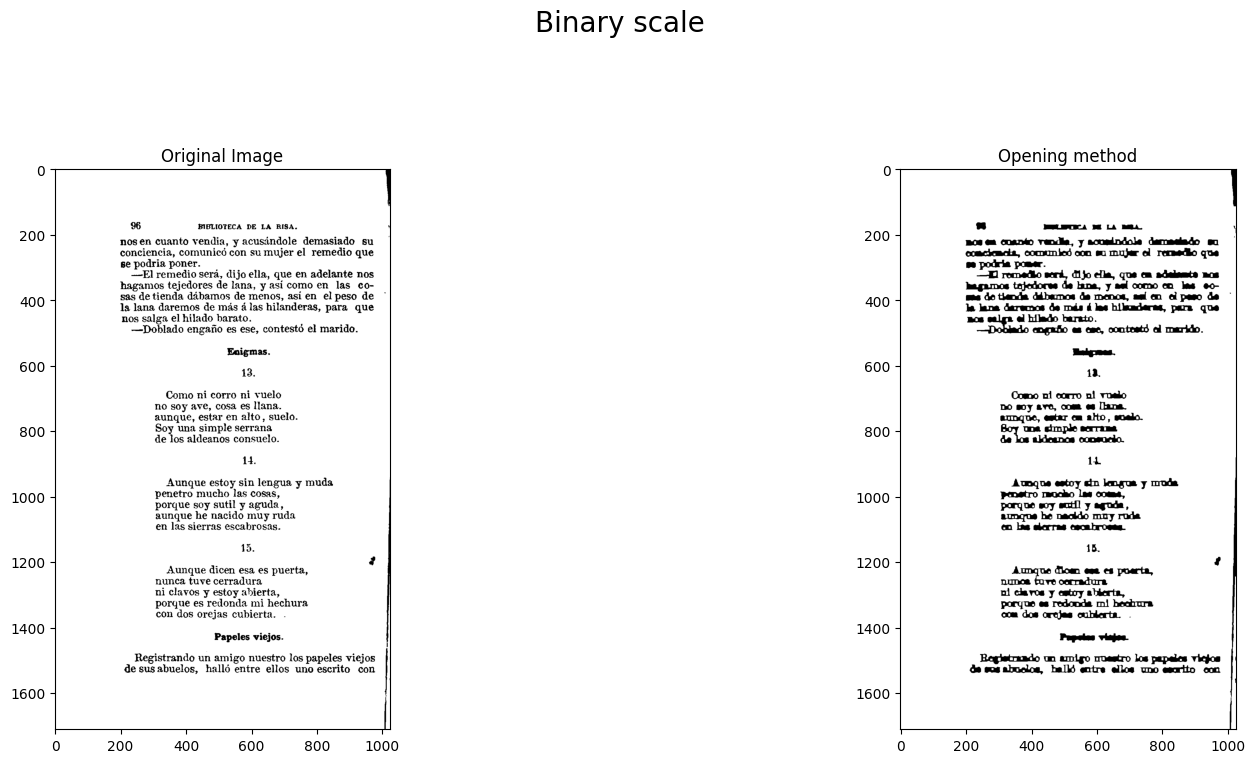

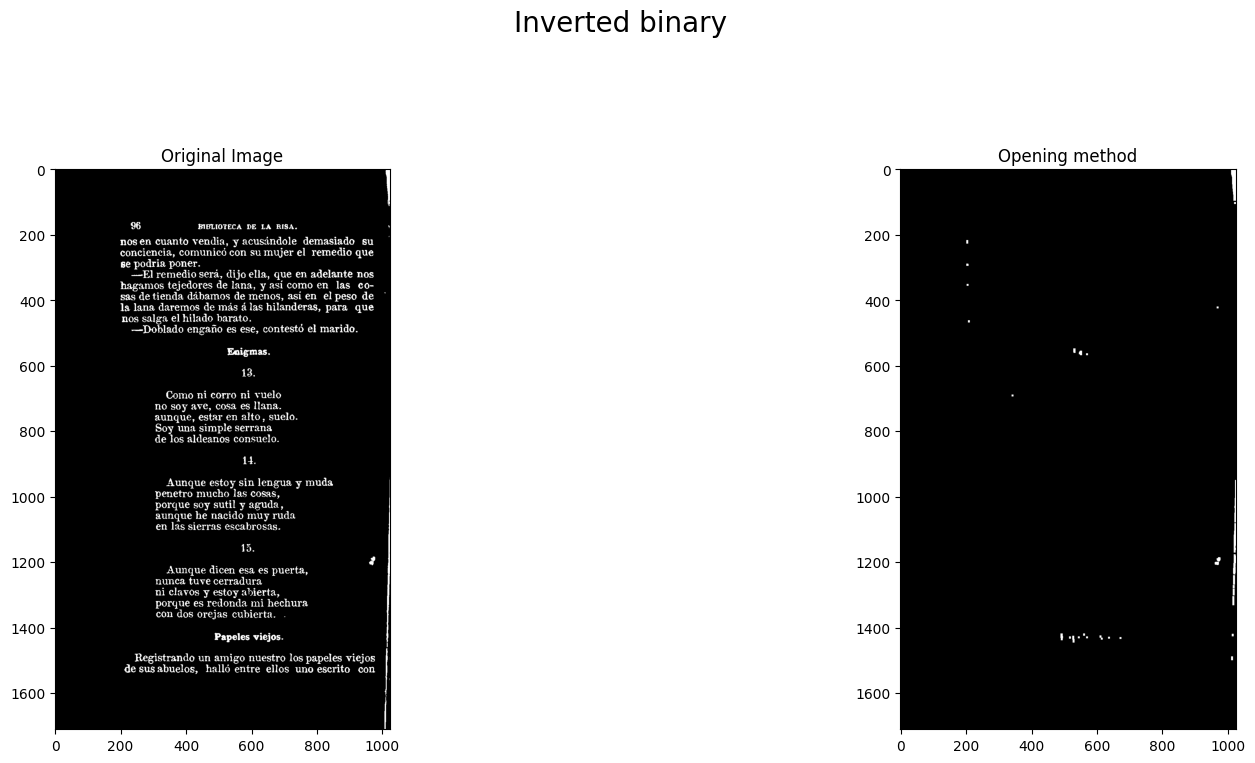

In [170]:
size_kernel = 6
#Creating kernel
kernel = np.ones((size_kernel, size_kernel), np.uint8)
#Import image
img = cv2.imread("data/escrito.jpg")

#------------------------------------------------------------------------------------------------------------------
#Convert the image to Grayscale
BGR2GRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20, 16))
fig.suptitle("Grayscale", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(BGR2GRAY, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

#Application of the method
opening = cv2.morphologyEx(BGR2GRAY.copy(), cv2.MORPH_OPEN, kernel)
# Subplot for processed image
plt.subplot(222), plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.title("Opening method".format(i+1))

plt.show()

#------------------------------------------------------------------------------------------------------
#Convert the image to binary scale
BINR = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

fig = plt.figure(figsize=(20, 16))
fig.suptitle("Binary scale", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(BINR, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

#Application of the method
opening = cv2.morphologyEx(BINR.copy(), cv2.MORPH_OPEN, kernel)
# Subplot for processed image
plt.subplot(222), plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.title("Opening method".format(i+1))

plt.show()

#------------------------------------------------------------------------------------------------------------------
#Convert the image to inverted binary scale
INV = cv2.bitwise_not(BINR)

fig = plt.figure(figsize=(20, 16))
fig.suptitle("Inverted binary", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(INV, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

#Application of the method
opening = cv2.morphologyEx(INV.copy(), cv2.MORPH_OPEN, kernel)
# Subplot for processed image
plt.subplot(222), plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.title("Opening method".format(i+1))

plt.show()


La operación de apertura erosiona una imagen y, después, dilata la imagen erosionada utilizando el mismo elemento estructurante para ambas operaciones.

La apertura morfológica es útil para eliminar objetos pequeños y líneas finas de una imagen a la vez que se conservan la forma y el tamaño de los objetos más grandes de la imagen.

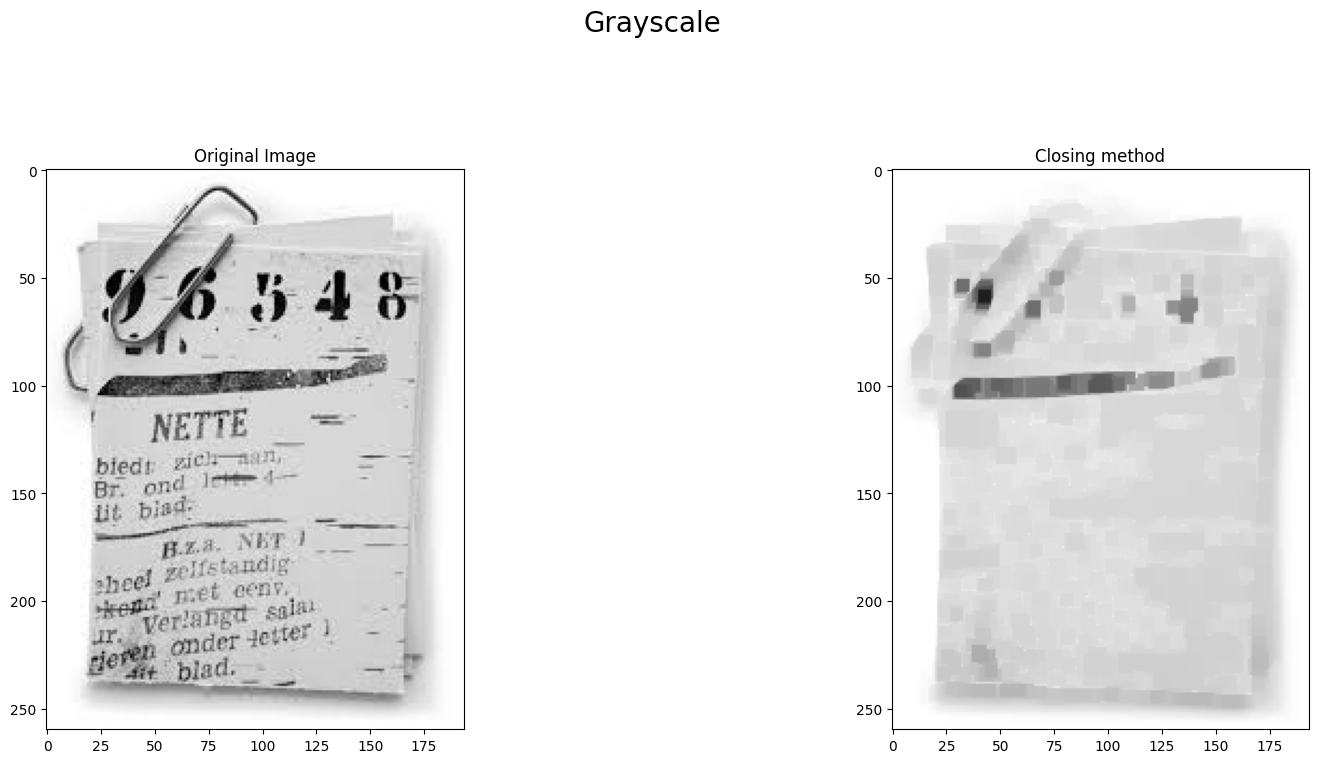

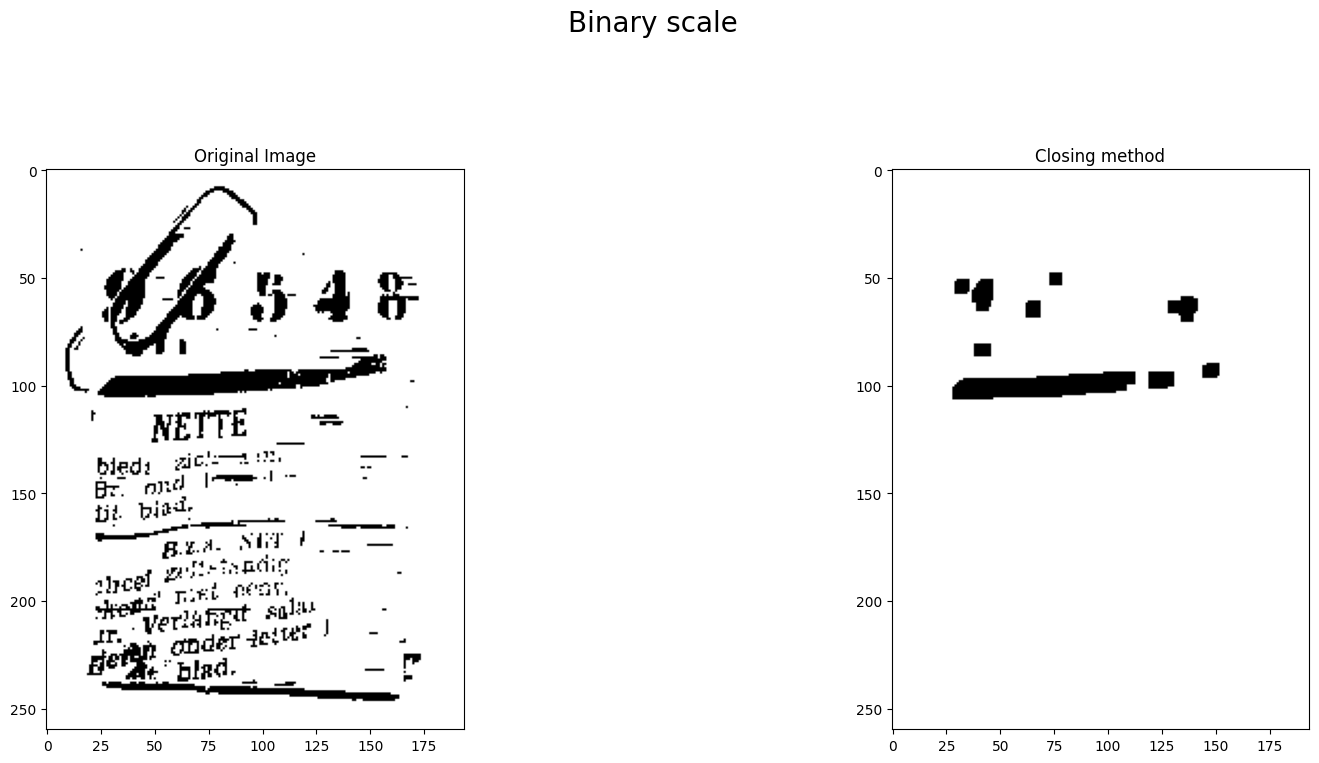

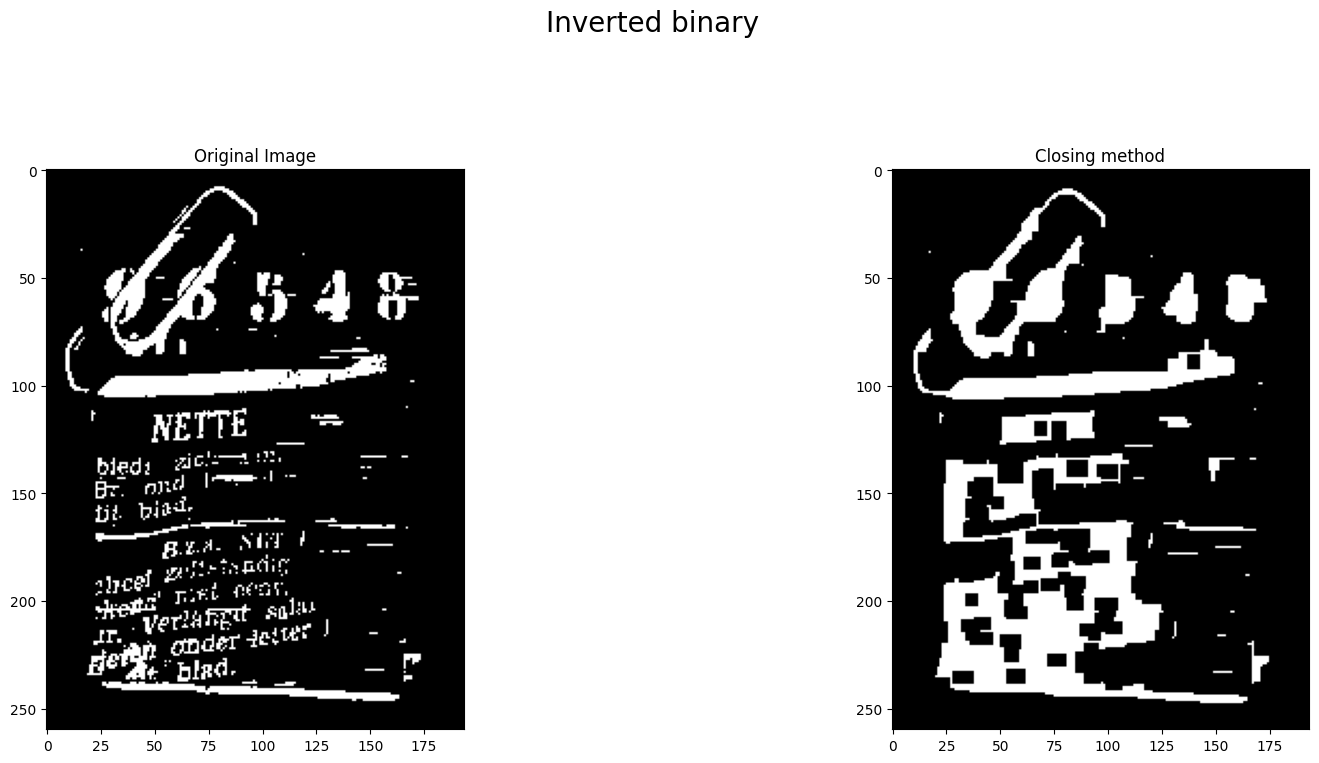

In [171]:
size_kernel = 6
#Creating kernel
kernel = np.ones((size_kernel, size_kernel), np.uint8)
#Import image
img = cv2.imread("data/escrito.jpeg")

#------------------------------------------------------------------------------------------------------------------
#Convert the image to grayscale
BGR2GRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Gray
fig = plt.figure(figsize=(20, 16))
fig.suptitle("Grayscale", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(BGR2GRAY, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

#Application of the method
closing = cv2.morphologyEx(BGR2GRAY.copy(), cv2.MORPH_CLOSE, kernel)
# Subplot for processed image
plt.subplot(222), plt.imshow(cv2.cvtColor(closing , cv2.COLOR_BGR2RGB))
plt.title("Closing method".format(i+1))

plt.show()

#------------------------------------------------------------------------------------------------------
#Convert the image to binary scale
BINR = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

fig = plt.figure(figsize=(20, 16))
fig.suptitle("Binary scale", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(BINR, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

#Application of the method
closing = cv2.morphologyEx(BINR.copy(), cv2.MORPH_CLOSE, kernel)
# Subplot for processed image
plt.subplot(222), plt.imshow(cv2.cvtColor(closing , cv2.COLOR_BGR2RGB))
plt.title("Closing method".format(i+1))

plt.show()

#------------------------------------------------------------------------------------------------------------------
#Convert the image to inverted binary scale
INV = cv2.bitwise_not(BINR)

fig = plt.figure(figsize=(20, 16))
fig.suptitle("Inverted binary", size=20)

# Subplot for original image
plt.subplot(221), plt.imshow(cv2.cvtColor(INV, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

#Application of the method
closing = cv2.morphologyEx(INV.copy(), cv2.MORPH_CLOSE, kernel)
# Subplot for processed image
plt.subplot(222), plt.imshow(cv2.cvtColor(closing , cv2.COLOR_BGR2RGB))
plt.title("Closing method".format(i+1))

plt.show()


La operación de cierre dilata una imagen y, después, erosiona la imagen dilatada utilizando el mismo elemento estructurante para ambas operaciones.

El cierre morfológico es útil para rellenar huecos pequeños en una imagen a la vez que se conservan la forma y el tamaño de los huecos y objetos grandes de la imagen..